In [1]:
import numpy as np
import matplotlib.pyplot as plt

import comp_giannoulis as comp

In [2]:
save_plots = False

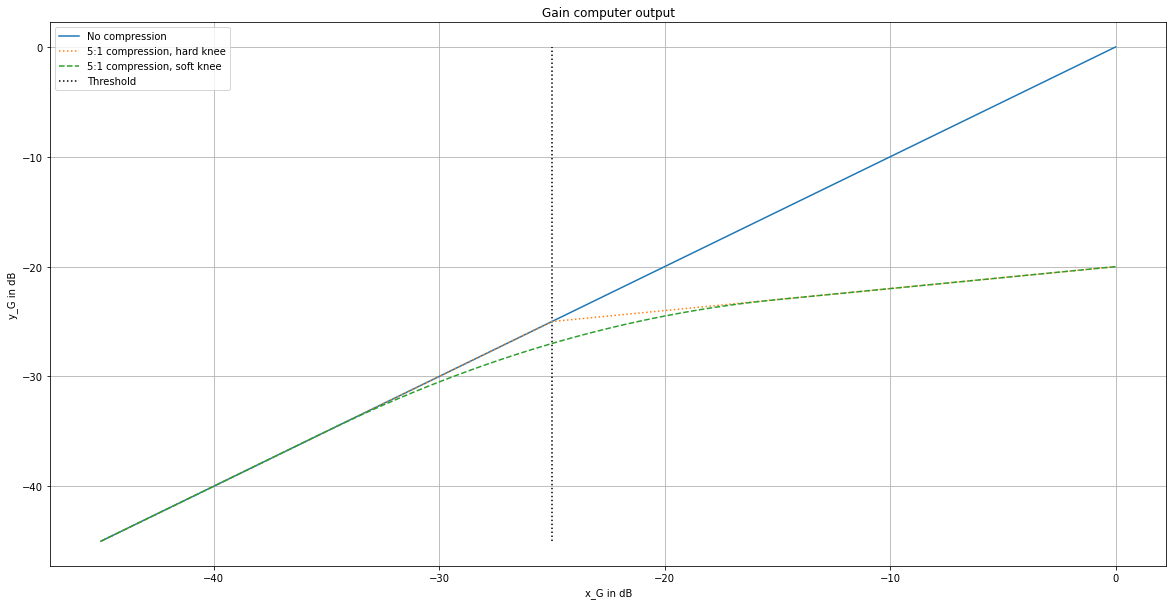

In [3]:
# Validation gain_computer
# Test Signal
x_G = np.linspace(-45, 0, 100)

# Compressor parameters
threshold = -25
ratio = 5

y_data_hk = comp.gain_computer(data=x_G, threshold=threshold, ratio=ratio, knee_width=0)
y_data_sk = comp.gain_computer(data=x_G, threshold=threshold, ratio=ratio, knee_width=20)

# Plot
plt.figure(figsize=(20,10))
plt.plot(x_G,x_G, label="No compression")
plt.plot(x_G,y_data_hk, ':', label=str(ratio)+":1 compression, hard knee")
plt.plot(x_G,y_data_sk, '--', label=str(ratio)+":1 compression, soft knee")
plt.vlines(x=threshold, ymin=np.min(x_G), ymax=np.max(x_G), linestyles='dotted', label="Threshold")
plt.grid(True, which="both")
plt.legend()
plt.xlabel("x_G in dB")
plt.ylabel("y_G in dB")
plt.title("Gain computer output")

if(save_plots):
    plt.savefig('plots/gain_computer.png')

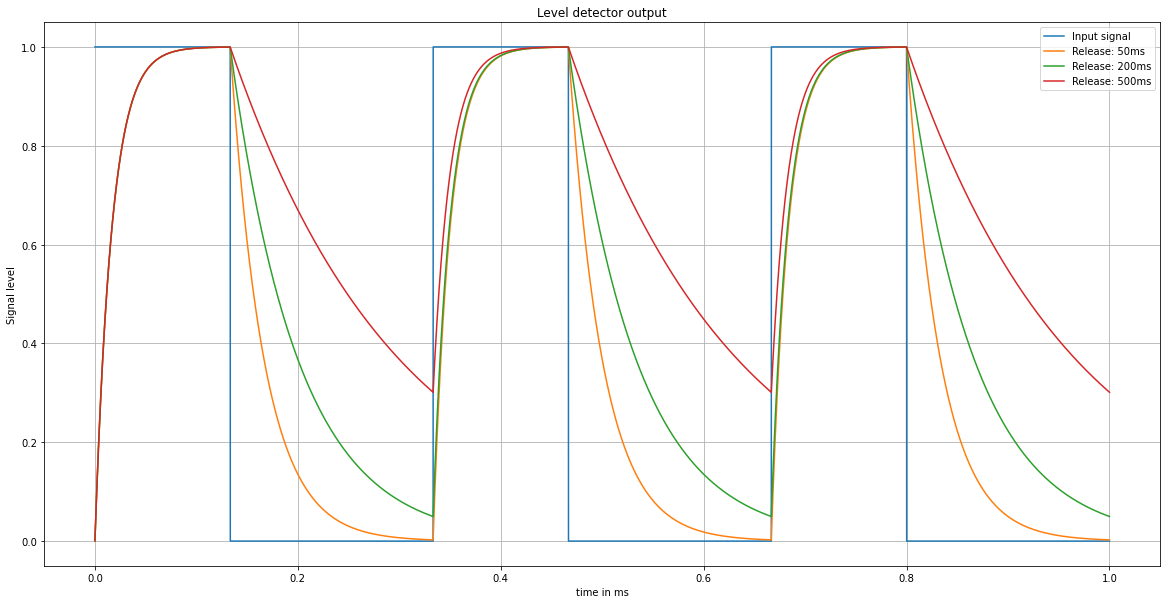

In [4]:
# Validation: level detector
# Test signal
fS = 48e3
sig_len = 3
test_sig = np.zeros(int(fS))
len_ones = fS*400e-3
test_sig[:int(len_ones)] = np.ones(int(len_ones))
test_sig = np.tile(test_sig,sig_len)

# Global compressor parameter
attack = 50e-3

level_test_r50ms = comp.level_detector(data=test_sig, attack=attack, release=100e-3)
level_test_r200ms = comp.level_detector(data=test_sig, attack=attack, release=200e-3)
level_test_r500ms = comp.level_detector(data=test_sig, attack=attack, release=500e-3)

x = np.linspace(0,1,len(test_sig))
plt.figure(figsize=(20,10))
plt.plot(x, test_sig, '-', label="Input signal")
plt.plot(x, level_test_r50ms, label="Release: 50ms")
plt.plot(x, level_test_r200ms, label="Release: 200ms")
plt.plot(x, level_test_r500ms, label="Release: 500ms")
plt.grid(True, which="both")
plt.legend()
plt.xlabel("time in ms")
plt.ylabel("Signal level")
plt.title("Level detector output")

if(save_plots):
    plt.savefig('plots/level_detector.png')